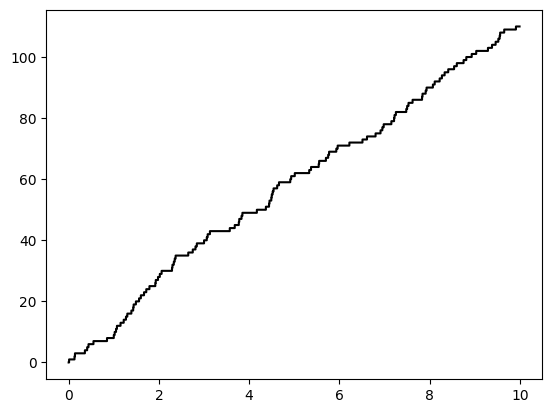

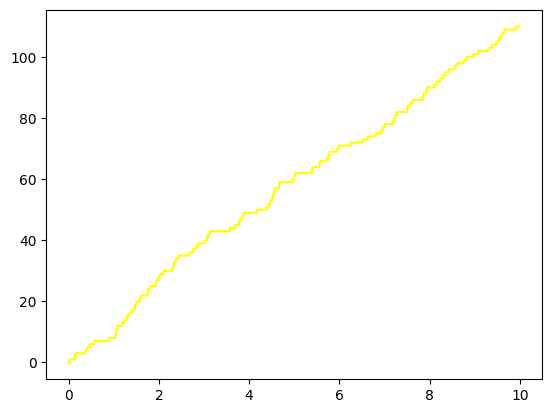

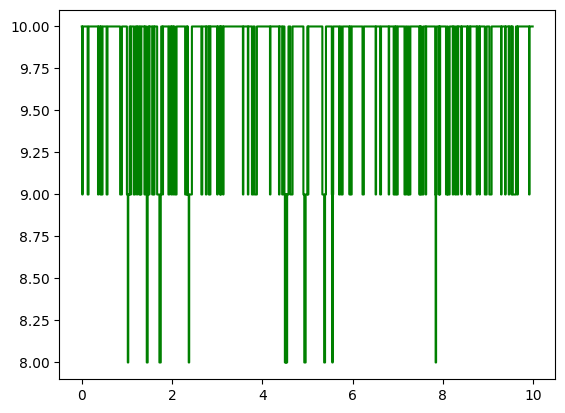

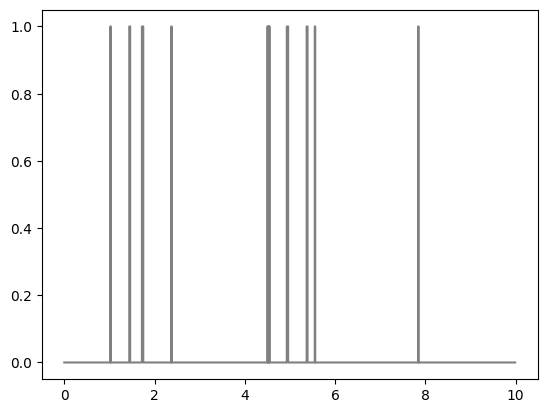

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#all_mech = input("Введите кол-во механизмов: ")
#lamda = input("Введите ламбду: ")
#meu = input("Введите ню: ")
#mechanic = input("Введите кол-во механиков: ")
#t = input("Введите шаг: ")
#max_t = input("Введите длину графика: ")

all_mech = 10 #int(all_mech)#10
lamda =  0.01 #float(lamda)#0.8
meu = 0.9 #float(meu)#0.6
mechanic = 1 #int(mechanic)#3
delta = 0.01 #float(t)#0.01
max_t = 10 #float(max_t)#10

A = [0 for i in range(int(max_t/delta))]
D = [0 for i in range(int(max_t/delta))]
B = [0 for i in range(int(max_t/delta))]
work_mech = [0 for i in range(int(max_t/delta))]
queue = [0 for i in range(int(max_t/delta))]
temp = [[delta*i] for i in range(int(max_t/delta))]

def jump(a):
    n = np.random.random()
    if (n >= 0.5) and (n <= 0.5 + a):
        return 1
    else:
        return 0

work_mech[0] = all_mech
t = delta
x=0
y=0

for i in range(1, int(max_t/delta), 1):   
    if (all_mech - work_mech[i-1] != 10):
        if jump(work_mech[i-1]*lamda) == 1:
            A[i] = A[i-1] + 1
            y = 1
        else:
            A[i] = A[i-1]
            y = 0
    else:
        A[i] = A[i-1]

    if (all_mech - work_mech[i-1] != 0):
        if jump(min(mechanic,all_mech-work_mech[i-1])*meu) == 1:
            D[i] = D[i-1] + 1
            x = 1
        else:
            D[i] = D[i-1]
            x = 0
    else:
        D[i] = D[i-1]

    work_mech[i] = work_mech[i-1]-y+x
    y=0
    x=0
    queue[i] = max(all_mech-mechanic-work_mech[i], 0)
    t+=delta

plt.figure('Поломка')
plt.step(temp, A, 'Black')

plt.figure('Починка')
plt.step(temp, D, 'Yellow')

plt.figure('Работающие устройства')
plt.step(temp, work_mech, 'Green')

plt.figure('Очередь')
plt.step(temp, queue, 'Grey')
plt.show()

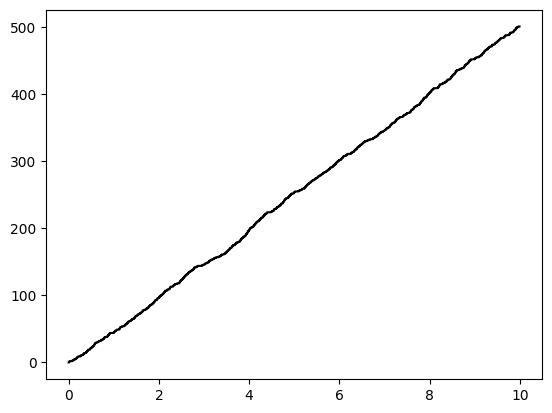

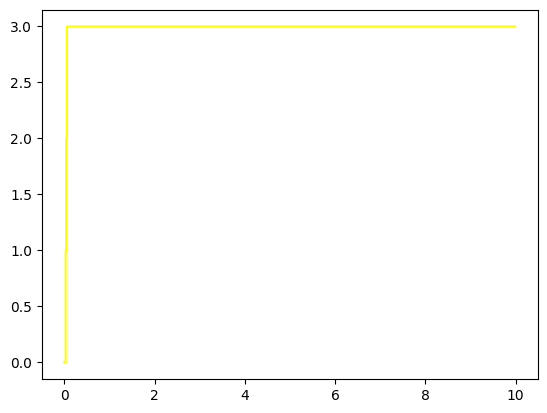

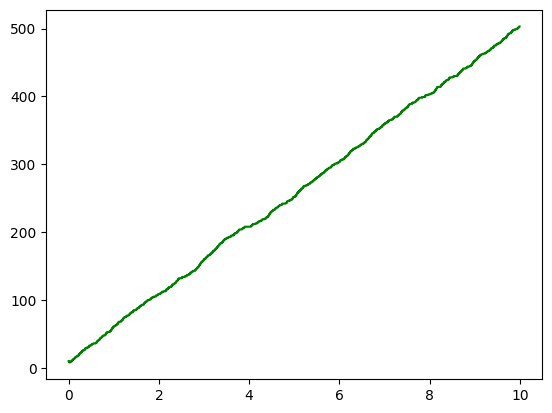

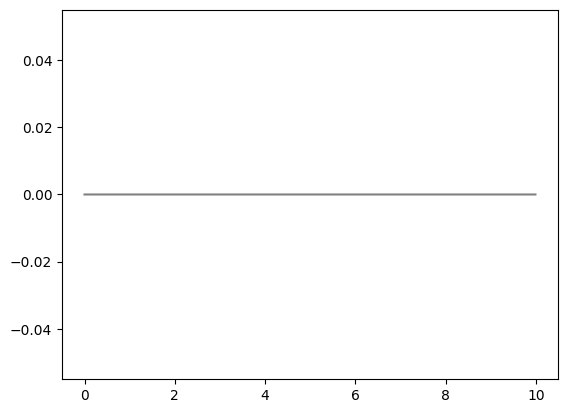

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#all_mech = input("Введите кол-во механизмов: ")
#lamda = input("Введите ламбду: ")
#meu = input("Введите ню: ")
#mechanic = input("Введите кол-во механиков: ")
#t = input("Введите шаг: ")
#max_t = input("Введите длину графика: ")
#p = input("Введите вероятность прохождения ОТК: ")

all_mech = 10 #int(all_mech)#10
lamda =  0.8 #float(lamda)#0.8
meu = 0.6 #float(meu)#0.6
mechanic = 3 #int(mechanic)#3
delta = 0.01 #float(t)#0.01
max_t = 10 #float(max_t)#10
p = 0.8 #float(p)#0.8

A = [0 for i in range(int(max_t/delta))]
D = [0 for i in range(int(max_t/delta))]
B = [0 for i in range(int(max_t/delta))]
F = [0 for i in range(int(max_t/delta))]
work_mech = [0 for i in range(int(max_t/delta))]
queue = [0 for i in range(int(max_t/delta))]
priority_queue = [0 for i in range(int(max_t/delta))]
temp = [[delta*i] for i in range(int(max_t/delta))]

def jump(a):
    n = np.random.random()
    if (n >= 0.5) and (n <= 0.5 + a):
        return 1
    else:
        return 0

work_mech[0] = all_mech
t = delta
x = 0
y = 0
z = 0

for i in range(1, int(max_t/delta), 1):   
    if (all_mech - work_mech[i-1] != 10):
        if jump(work_mech[i-1]*lamda) == 1:
            A[i] = A[i-1] + 1
            y = 1
        else:
            A[i] = A[i-1]
            y = 0
    else:
        A[i] = A[i-1]

    if (all_mech - work_mech[i-1] != 0):
        if jump(min(mechanic,all_mech-work_mech[i-1])*meu) == 1:
            D[i] = D[i-1] + 1
            x = 1
        else:
            D[i] = D[i-1]
            x = 0
        if (x == 1):
            if(jump(p) == 1):
                B[i] = B[i-1] + 1
                F[i] = F[i-1]
                z = 1
            else:
                B[i] = B[i-1]
                F[i] = F[i-1] + 1
                z = 0
    else:
        D[i] = D[i-1]
    if(priority_queue[i-1] != 0) and (z == 1):
        priority_queue[i] = priority_queue[i-1] - z 
        queue[i] = queue[i-1]
    else:
        queue[i] = max(queue[i-1]-z, 0)
    if(priority_queue[i-1] == 0) and (z == 0):
        queue[i] = queue[i-1] - 1
        priority_queue[i] = priority_queue[i-1] + 1

    work_mech[i] = work_mech[i-1]-y+z
    y=0
    x=0
    queue[i] = max(all_mech-mechanic-work_mech[i]-priority_queue[i], 0)
    t+=delta

plt.figure('Поломка')
plt.step(temp, A, 'Black')

plt.figure('Починка')
plt.step(temp, D, 'Yellow')

plt.figure('Работающие устройства')
plt.step(temp, work_mech, 'Green')

plt.figure('Очередь')
plt.step(temp, queue, 'Grey')
plt.show()

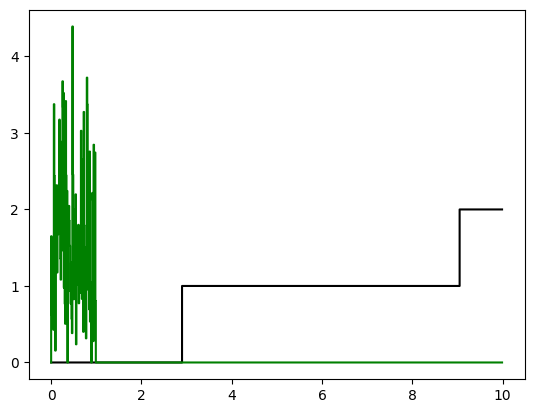

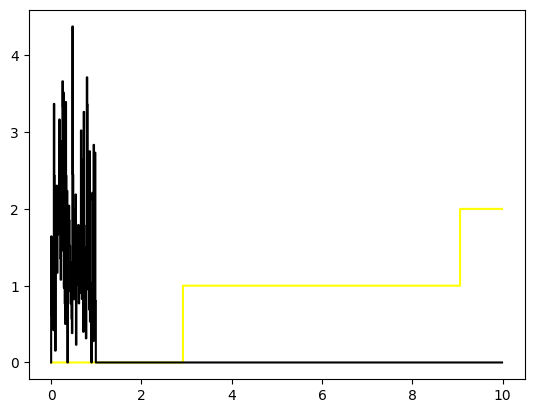

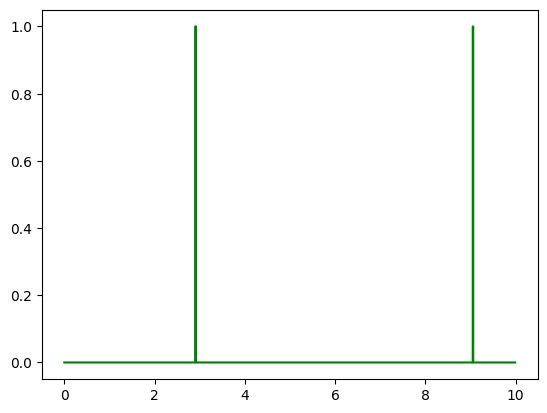

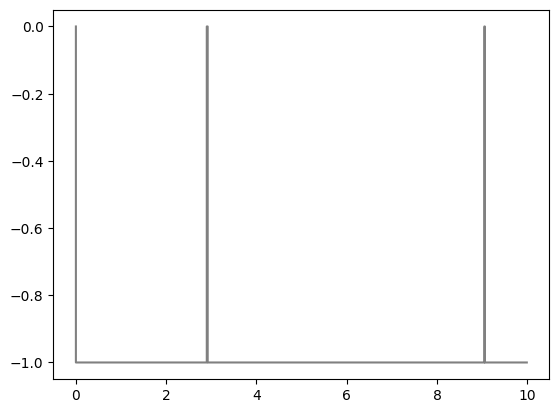

In [2]:
# M|M|1 
import matplotlib.pyplot as plt
import numpy as np

lamda =  0.3 #float(lamda)#0.8
meu = 0.6 #float(neu)#0.6
delta = 0.01 #float(t)#0.01
max_t = 10 #float(max_t)#10

A = [0 for i in range(int(max_t/delta))]
D = [0 for i in range(int(max_t/delta))]
s = [0 for i in range(int(max_t/delta))]
ED = [0 for i in range(int(max_t/delta))]
ED2 = [0 for i in range(int(max_t/delta))]
EA = [0 for i in range(int(max_t/delta))]
EA2 = [0 for i in range(int(max_t/delta))]
queue = [0 for i in range(int(max_t/delta))]
temp = [[delta*i] for i in range(int(max_t/delta))]

t = delta
x = 0
y = 0

def jump(a):
    n = np.random.random()
    if (n >= 0.5) and (n <= 0.5 + a):
        return 1
    else:
        return 0

for j in range (1, 100 , 1):
    for i in range (1, int(max_t/delta), 1):
        if jump(t*lamda) == 1:
            A[i] = A[i-1] + 1
            x = 1
        else:
            A[i] = A[i-1]
            x = 0
        if(s[i-1] != 0):
            if jump(meu) == 1:
                D[i] = D[i-1] + 1
                y = 1
            else:
                D[i] = D[i-1]
                y = 0
        else:
            D[i] = D[i-1]
        s[i] = s[i-1] + x - y 
        EA[j] = (EA[j]*(i-1)+A[i])/i
        EA2[j] = (EA2[j]*(i-1)+A[i]**2)/i
        ED[j] = (ED[j]*(i-1)+D[i])/i
        ED2[j] = (ED2[j]*(i-1)+D[i]**2)/i
        x = 0
        y = 0 
        queue[i] = min(s[i]-1, 0)


plt.figure('Поломка')
plt.step(temp, A, 'Black')
plt.step(temp, EA, 'Green')

plt.figure('Починка')
plt.step(temp, D, 'Yellow')
plt.step(temp, ED, 'Black')

plt.figure('Работающие устройства')
plt.step(temp, s, 'Green')

plt.figure('Очередь')
plt.step(temp, queue, 'Grey')
plt.show()